In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")

In [3]:
train = pd.read_csv('./data/train_V2.csv')

In [7]:
df = train[(train['matchType'].isin(['solo','solo-fpp','duo','duo-fpp','squad','squad-fpp']))]

#number of player each match/each team
df['numJoined'] = df.groupby('matchId')['matchId'].transform('count')
df['teamNum'] = df.groupby('groupId')['groupId'].transform('count')

df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
df['headshotPerc'] = df['headshotKills']/df['kills']

#since each game has different num of players, needs to normalize
normalize = (100-df['numJoined'])/100 + 1
df['killsNorm'] = df['kills'] * normalize
df['damageDealtNorm'] = df['damageDealt'] * normalize
df['DBNOsNorm'] = df['DBNOs'] * normalize

df['killstreakOverKills'] = df['killStreaks']/(df['kills'])
df['killsPerDistance'] = df['killsNorm']/(df['totalDistance'] + 1e31)

df['weaponPerDistance'] = df['weaponsAcquired']/(df['totalDistance'] + 1e31)

#assessing teamwork
df['teamContribution'] = preprocessing.scale(df['assists']) + preprocessing.scale(df['revives']) - preprocessing.scale(df['teamKills'])
#solo players do not have teamwork
df['teamContribution'].loc[df['matchType'].isin(['solo','solo-fpp'])] = 0

#explore heals and boost
#allow you to stay out of zone longer
df['healsAndBoosts'] = df['heals'] + df['boosts']
df['healsAndBoostsPerWalkDistance'] = df['healsAndBoosts']/(df['walkDistance']+1e31)
df['healsAndBoostsPerKill'] = df['healsAndBoosts']/(df['killsNorm']+1e31)


#deal with inf and nan
df.replace([np.inf, -np.inf], np.nan)
df.fillna(0,inplace=True)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4446966 entries, 0 to 4446965
Data columns (total 29 columns):
Id                 object
groupId            object
matchId            object
assists            int64
boosts             int64
damageDealt        float64
DBNOs              int64
headshotKills      int64
heals              int64
killPlace          int64
killPoints         int64
kills              int64
killStreaks        int64
longestKill        float64
matchDuration      int64
matchType          object
maxPlace           int64
numGroups          int64
rankPoints         int64
revives            int64
rideDistance       float64
roadKills          int64
swimDistance       float64
teamKills          int64
vehicleDestroys    int64
walkDistance       float64
weaponsAcquired    int64
winPoints          int64
winPlacePerc       float64
dtypes: float64(6), int64(19), object(4)
memory usage: 983.9+ MB


In [4]:
pd.options.display.max_columns = None
train.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [4]:
df = train[train['matchType'].isin(['solo','solo-fpp','duo','duo-fpp','squad','squad-fpp'])]

In [6]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875


In [7]:
solo_df = df[df['matchType'].isin(['solo','solo-fpp'])]
team_df = df[df['matchType'].isin(['duo','duo-fpp','squad','squad-fpp'])]

In [9]:
df['is_team'] = np.where(df['matchType'].isin(['solo','solo-fpp']),0,1)

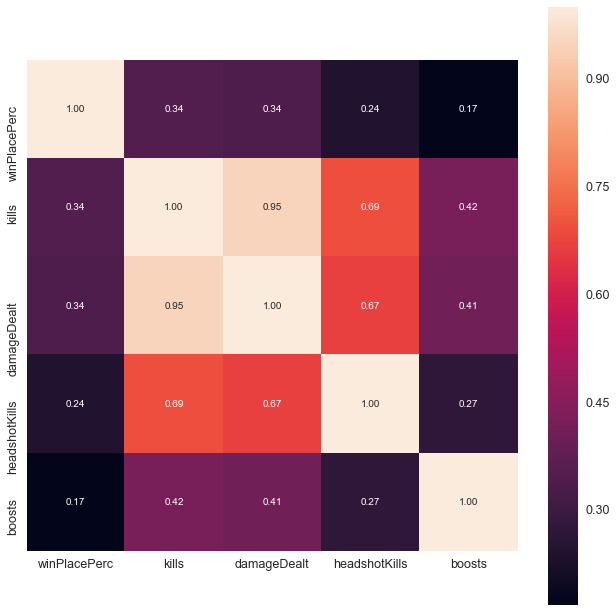

In [32]:
solo_top = solo_df[solo_df['winPlacePerc'] >= 0.95]
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = solo_top.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(solo_top[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

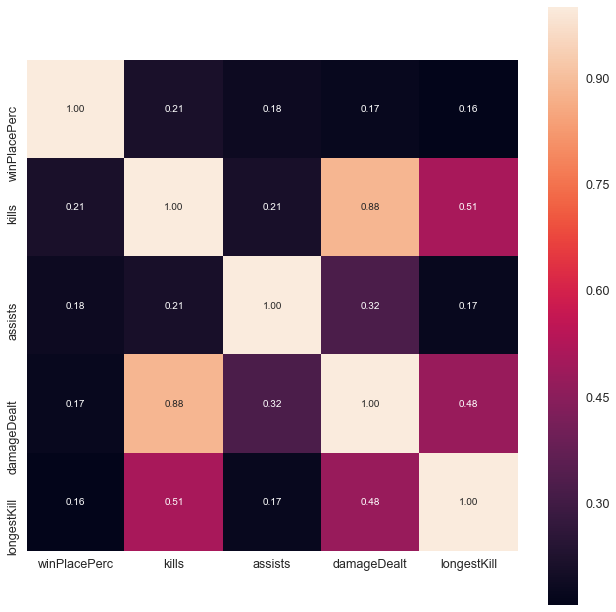

In [33]:
team_top = team_df[team_df['winPlacePerc'] >= 0.95]
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = team_top.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(team_top[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [34]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,is_team
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,1241,0,0,0.00,1306,squad-fpp,28,26,-1,0,0.0000,0,0.00,0,0,244.80,1,1466,0.4444,1
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.00,5,0,0.6400,1
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.80,2,0,0.7755,1
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,0,0,0,0.00,1436,squad-fpp,31,30,1408,0,0.0000,0,0.00,0,0,202.70,3,0,0.1667,1
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,0,1,1,58.53,1424,solo-fpp,97,95,1560,0,0.0000,0,0.00,0,0,49.75,2,0,0.1875,0


In [5]:
df = train[(train['matchType'].isin(['solo','solo-fpp','duo','duo-fpp','squad','squad-fpp']))]

#number of player each match/each team
df['numJoined'] = df.groupby('matchId')['matchId'].transform('count')
df['teamNum'] = df.groupby('groupId')['groupId'].transform('count')

df['totalDistance'] = df['rideDistance'] + df['swimDistance'] + df['walkDistance']
df['headshotPerc'] = df['headshotKills']/df['kills']

#since each game has different num of players, needs to normalize
normalize = (100-df['numJoined'])/100 + 1
df['killsNorm'] = df['kills'] * normalize
df['damageDealtNorm'] = df['damageDealt'] * normalize
df['DBNOsNorm'] = df['DBNOs'] * normalize

df['killstreakOverKills'] = df['killStreaks']/(df['kills'])
df['killsPerDistance'] = df['killsNorm']/(df['totalDistance'] + 1e31)

df['weaponPerDistance'] = df['weaponsAcquired']/(df['totalDistance'] + 1e31)

#assessing teamwork
df['teamContribution'] = preprocessing.scale(df['assists']) + preprocessing.scale(df['revives']) - preprocessing.scale(df['teamKills'])
#solo players do not have teamwork
df['teamContribution'].loc[df['matchType'].isin(['solo','solo-fpp'])] = 0

#explore heals and boost
#allow you to stay out of zone longer
df['healsAndBoosts'] = df['heals'] + df['boosts']
df['healsAndBoostsPerWalkDistance'] = df['healsAndBoosts']/(df['walkDistance']+1e31)
df['healsAndBoostsPerKill'] = df['healsAndBoosts']/(df['killsNorm']+1e31)


#deal with inf and nan
df.replace([np.inf, -np.inf], np.nan)
df.fillna(0,inplace=True)

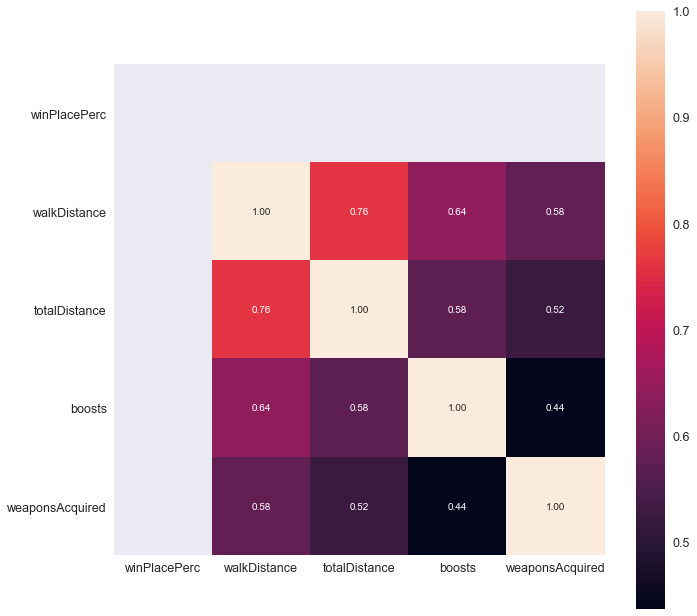

In [40]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [6]:
top50_df = df[df['winPlacePerc']>0.50]  

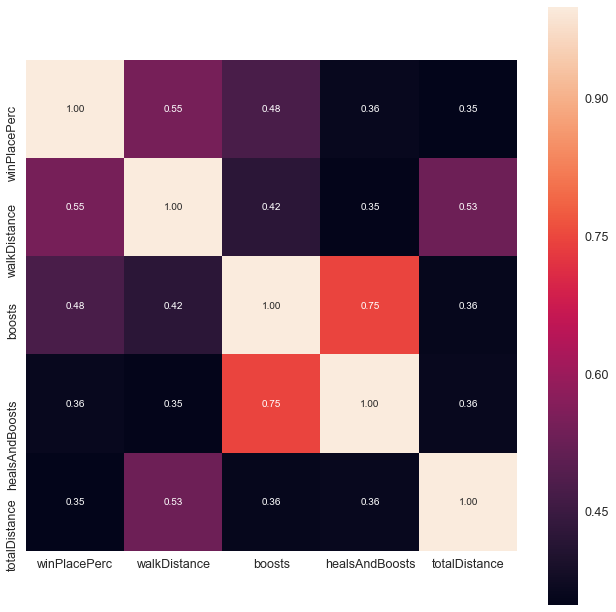

In [52]:
k = 5 #number of variables for heatmap
f,ax = plt.subplots(figsize=(11, 11))
cols = top50_df.corr().nlargest(k, 'winPlacePerc')['winPlacePerc'].index
cm = np.corrcoef(top50_df[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm,cbar = True,annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [9]:
pd.options.display.max_columns = None
top50_df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,matchDuration,matchType,maxPlace,numGroups,rankPoints,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,numJoined,teamNum,totalDistance,headshotPerc,killsNorm,damageDealtNorm,DBNOsNorm,killsPerDistance,weaponPerDistance,killPlaceOverMaxPlace,teamContribution,healsAndBoosts,healsAndBoostsPerWalkDistance
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.470,0,0,0,57,0,0,0,0.00,1777,squad-fpp,26,25,1484,0,0.0045,0,11.04,0,0,1434.0,5,0,0.6400,91,4,1445.0445,0.0,0.00,99.70230,0.0,0.000000,0.003458,2.192308,-0.607622,0,0.000000
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.000,0,0,0,47,0,0,0,0.00,1318,duo,50,47,1491,0,0.0000,0,0.00,0,0,161.8,2,0,0.7755,98,2,161.8000,0.0,0.00,69.36000,0.0,0.000000,0.012285,0.940000,1.145500,0,0.000000
7,311b84c6ff4390,eaba5fcb7fc1ae,292611730ca862,0,0,8.538,0,0,0,48,1000,0,0,0.00,1967,solo-fpp,96,92,-1,0,2004.0000,0,0.00,0,0,1089.0,6,1500,0.7368,96,1,3093.0000,0.0,0.00,8.87952,0.0,0.000000,0.001939,0.500000,NaN,0,0.000000
12,ce4f6ac165705e,da24cdb91969cc,535b5dbd965a94,0,0,0.000,0,0,0,37,0,0,0,0.00,1774,squad-fpp,29,28,1766,0,6639.0000,0,0.00,0,0,2784.0,6,0,0.9286,90,3,9423.0000,0.0,0.00,0.00000,0.0,0.000000,0.000637,1.275862,-0.607622,0,0.000000
13,b7807186e3f679,3c08e461874749,2c30ddf481c52d,0,1,324.200,0,1,5,5,986,4,1,49.83,1886,solo-fpp,97,94,-1,0,1228.0000,0,76.84,0,0,2050.0,6,1462,0.8750,97,1,3354.8400,0.2,4.12,333.92600,0.0,0.001228,0.001788,0.051546,NaN,6,0.002925


In [ ]:
#features to drop
#cheaters has no control over
feature_drop = ['killPlace','killPoints','matchDuration','matchType','maxPlace',
                'numGroups','rankPoints','winPoints','kills','damageDealt','DBNOs',
                'heals','boots']
for feature in feature_drop:
    top50_df.drop(feature, axis=1, inplace=True)

[20]	valid_0's l1: 0.0638376
[40]	valid_0's l1: 0.0615352
[60]	valid_0's l1: 0.0608425
[80]	valid_0's l1: 0.0604987
[100]	valid_0's l1: 0.060297


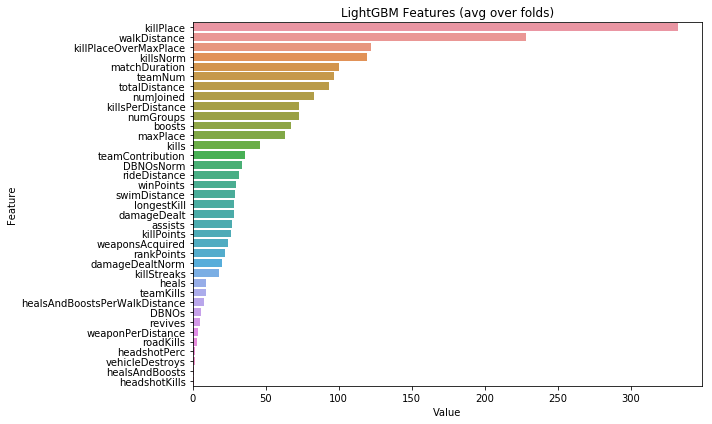

In [7]:
#top50_df.drop(columns=['matchType'], inplace=True)

def train_test_split(df, test_size=0.3):
    import random
    match_ids = df['matchId'].unique().tolist()
    train_size = int(len(match_ids) * (1 - test_size))
    train_match_ids = random.sample(match_ids, train_size)

    train = df[df['matchId'].isin(train_match_ids)]
    test = df[-df['matchId'].isin(train_match_ids)]

    return train, test

target = 'winPlacePerc'
cols_to_drop = ['Id', 'groupId', 'matchId', 'matchType', target]
cols_to_fit = [col for col in top50_df.columns if col not in cols_to_drop]
train, val = train_test_split(top50_df, 0.1)

from lightgbm import LGBMRegressor

params = {
    'n_estimators': 100,
    'learning_rate': 0.3, 
    'num_leaves': 20,
    'objective': 'regression_l2', 
    'metric': 'mae',
    'verbose': -1,
}

model = LGBMRegressor(**params)
model.fit(
    train[cols_to_fit], train[target],
    eval_set=[(val[cols_to_fit], val[target])],
    eval_metric='mae',
    verbose=20,
)

feature_importance = pd.DataFrame(sorted(zip(model.feature_importances_, cols_to_fit)), columns=['Value','Feature'])

plt.figure(figsize=(10, 6))
sns.barplot(x="Value", y="Feature", data=feature_importance.sort_values(by="Value", ascending=False))
plt.title('LightGBM Features (avg over folds)')
plt.tight_layout()


In [13]:
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,...,killsNorm,damageDealtNorm,DBNOsNorm,killstreakOverKills,killsPerDistance,weaponPerDistance,teamContribution,healsAndBoosts,healsAndBoostsPerWalkDistance,healsAndBoostsPerKill
0,7f96b2f878858a,4d4b580de459be,a10357fd1a4a91,0,0,0.00,0,0,0,60,...,0.00,0.0000,0.0,0.0,0.000000e+00,1.000000e-31,-0.607622,0,0.0,0.0
1,eef90569b9d03c,684d5656442f9e,aeb375fc57110c,0,0,91.47,0,0,0,57,...,0.00,99.7023,0.0,0.0,0.000000e+00,5.000000e-31,-0.607622,0,0.0,0.0
2,1eaf90ac73de72,6a4a42c3245a74,110163d8bb94ae,1,0,68.00,0,0,0,47,...,0.00,69.3600,0.0,0.0,0.000000e+00,2.000000e-31,1.145500,0,0.0,0.0
3,4616d365dd2853,a930a9c79cd721,f1f1f4ef412d7e,0,0,32.90,0,0,0,75,...,0.00,35.8610,0.0,0.0,0.000000e+00,3.000000e-31,-0.607622,0,0.0,0.0
4,315c96c26c9aac,de04010b3458dd,6dc8ff871e21e6,0,0,100.00,0,0,0,45,...,1.03,103.0000,0.0,1.0,1.030000e-31,2.000000e-31,0.000000,0,0.0,0.0


In [36]:
data = df.copy()
data = data[['killsNorm','winPlacePerc']]
data['killsNorm'] = data['killsNorm'].astype('int')
outlier = np.percentile(data['killsNorm'],99)
data['killsNorm'].loc[data['killsNorm'] > outlier] = '8'
data['killsNorm'] = data['killsNorm'].astype('str')

In [38]:
N = 30
c = ['hsl('+str(h)+',50%'+',50%)' for h in linspace(0, 360, N)]
kill_num = list(set(data['killsNorm']))
graph_data = [{
    'y': data['winPlacePerc'].loc[data['killsNorm']==kill_num[i]],
    'name':kill_num[i],
    'type':'box',
    'marker':{'color': c[i]}
} for i in range(len(kill_num))]

layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          'title': 'Kills vs. Final Rank Percentile'
          }

py.iplot(graph_data)

In [2]:
c = ['hsl('+str(h)+',50%'+',50%)' for h in linspace(0, 360, N)]


NameError: name 'linspace' is not defined

In [11]:
import plotly.plotly as py



# generate an array of rainbow colors by fixing the saturation and lightness of the HSL representation of colour 
# and marching around the hue. 
# Plotly accepts any CSS color format, see e.g. http://www.w3schools.com/cssref/css_colors_legal.asp.
c = ['hsl('+str(h)+',50%'+',50%)' for h in linspace(0, 360, N)]

# Each box is represented by a dict that contains the data, the type, and the colour. 
# Use list comprehension to describe N boxes, each with a different colour and with different randomly generated data:
data = [{
    'y': 3.5*sin(pi * i/N) + i/N+(1.5+0.5*cos(pi*i/N))*random.rand(10), 
    'type':'box',
    'marker':{'color': c[i]}
    } for i in range(int(N))]

# format the layout
layout = {'xaxis': {'showgrid':False,'zeroline':False, 'tickangle':60,'showticklabels':False},
          'yaxis': {'zeroline':False,'gridcolor':'white'},
          'paper_bgcolor': 'rgb(233,233,233)',
          'plot_bgcolor': 'rgb(233,233,233)',
          }

py.iplot(data)

In [10]:
import plotly
plotly.tools.set_credentials_file(username='jhuo831alex', api_key='hIejbAalxmsP4IlYnSaS')